# 3.1 Data Visualization

**Goal:** Build skills and knowledge for making publication-quality data visualizations. The main things to keep in mind are "who is your audience?" and "what do you want to communicate?".


**Outline:**
* Introduce the `matplotlib` package
* Make an ugly default plot
* Go _beyond default_
* Explore other types of plots
* Look at a few ways to plot data uncertainty

## Additional Assigned Reading
[Ten Simple Rules for Better Figures](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)
Rougier, N. P., Droettboom, M., & Bourne, P. E. (2014), Ten Simple Rules for Better Figures. PLOS Computational Biology. 

## Visualization
Effective data visualization helps with data analysis and interpretation, but is also crutial for communicating your findings. `matplotlib` is the primary Python package for plotting. The `matplotlib` [website](https://matplotlib.org/) has extensive documentation, tutorials, and gallery examples.

**Watch this video about making plots.**

[![](http://img.youtube.com/vi/XFZRVnP-MTU/0.jpg)](http://www.youtube.com/watch?v=XFZRVnP-MTU "")


## Basic Default Plot

After importing the `matplotlib` package and loading or calculating the variables you wish to plot, you will call `matplotlib` functions to create your figure. `fig, ax = plt.subplots()` creates the figure object with a single set of axes. `ax.plot(x,y)` adds the data you want to plot to the figure. `plt.show()` will print your plot; in our Jupyter Notebook environment you don't need this line, but you would if you were writing python code outside of a notebook so I included it here.

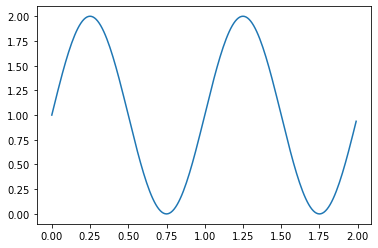

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting, a simple sine wave
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
plt.show()

This quick & simple plot may be useful for checking your data, but it's nearly useless for communication. 
![basic plot](./figures/Ya_basic.png)

<br>

There are many possible figure components you should consider when making your figure.

![Matplotlib figures features](./figures/figure_components.png)

> Source: [Matplotlib Tutorial](https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

For example we should add labels to our simple figure. This can be done with `ax.set()` or `plt.xlabel`. We'll also add a grid with `ax.grid()`.

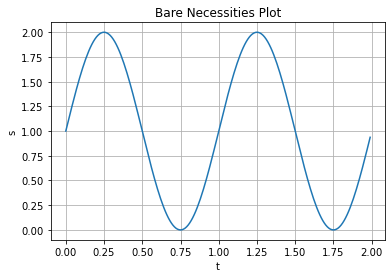

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting, a simple sine wave
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='t', ylabel='s', title='Bare Necessities Plot')
ax.grid()

fig.savefig("test.png")

There, we have done the bare minimium to have a readable figure. It can be saved with `fig.savefig()`. But we should continue and learn more tools for making **good**, publication quality figures.

## Using Additional Plot Features

There are many strategies for making good scientific figures. The primary goal is clarity, rather than aesthetics, but bad plots are also often ugly. The first thing to consider are your axes: they should be clearly labeled with a descriptive label that includes units. Increasing the `fontsize` of the labels makes them easier to read also.   

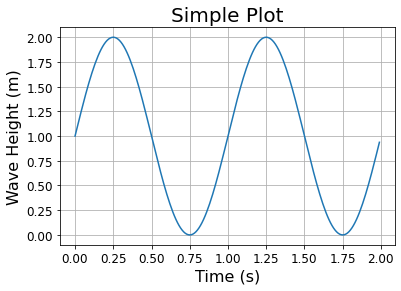

In [3]:
# We can use the same data again, we don't need to import matplotlib or declare t and s again
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set_title('Simple Plot', fontsize=20)
ax.set_xlabel('Time (s)', fontsize=16)
ax.set_ylabel('Wave Height (m)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid()


If you are plotting more than one dataset together on the same axes you should make it clear to the reader what the two datasets are with a legend using `plt.lengend()`. You can also differentiate them but plotting with different [line](https://matplotlib.org/gallery/lines_bars_and_markers/line_demo_dash_control.html#sphx-glr-gallery-lines-bars-and-markers-line-demo-dash-control-py) or [marker](https://matplotlib.org/gallery/lines_bars_and_markers/marker_reference.html#sphx-glr-gallery-lines-bars-and-markers-marker-reference-py) types. You may also want to adjust the limits of the x or y axis, this can be done with `plt.xlim([xmin, xmax])` and `plt.ylim([ymin, ymax])` or `ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))`.

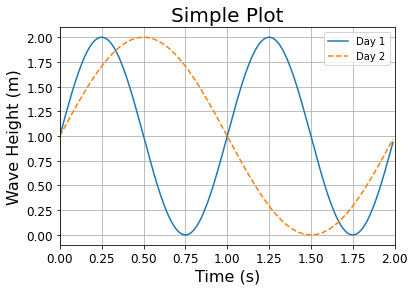

In [4]:
# declare a second variable to plot
s2 = 1 + np.sin( np.pi * t)

# We can use the same data again, we don't need to import matplotlib or declare t and s again
fig, ax = plt.subplots()
ax.plot(t, s,'-',label='Day 1') #make the second line solid
ax.plot(t, s2,'--',label='Day 2') #make the second line dashed 

ax.set_title('Simple Plot', fontsize=20)
ax.set_xlabel('Time (s)', fontsize=16)
ax.set_ylabel('Wave Height (m)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlim([0.0, 2.0])
ax.grid()
ax.legend()
plt.show()

## Other Types of Plots

`matplotlib` is capable of making many types of plots besides just simple line-plots. Below are examples of several, but not all, of the types of plots you can make. More compicated examples with more features can be found in the [matplotlib gallary](https://matplotlib.org/gallery/index.html).

<br>

### Histogram

We use histograms throughout this course to visualize how our data is distributed. They are easy to produce with the function `plt.hist()` ([documentation](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)). You can set the number of bins you plot. Setting `density=True` will make the histogram a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width, so that the area under the histogram integrates to 1. `density=False` is the default, where the total count per bin is displayed.

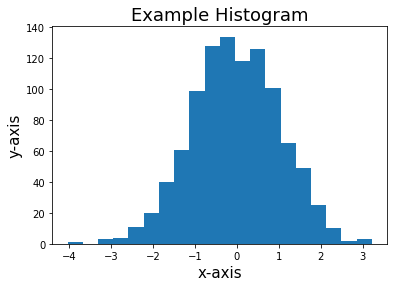

In [5]:
N_points = 1000
n_bins = 20

# Generate a normal distribution, center at x=0
x = np.random.randn(N_points)

# make a figure object with axis
fig, ax = plt.subplots()

# We can set the number of bins of the histogram with the `bins` kwarg
ax.hist(x, bins=n_bins,density=False)

ax.set_xlabel('x-axis', fontsize=15)
ax.set_ylabel('y-axis', fontsize=15)
ax.set_title('Example Histogram', fontsize=18)

plt.show()

### Bar Plot

Bar plots are similar to histograms, but the bins of counts are some category (like fruit in the example below). `plt.bar()` takes lists of names and count values as input.


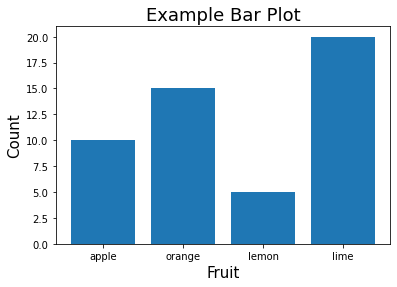

In [6]:
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots()
ax.bar(names, values)

ax.set_xlabel('Fruit', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Example Bar Plot', fontsize=18)

plt.show()

<br>

### Scatter Plot

For some datasets plotting as marker points instead of a line will be prefered. The `plt.scatter()` function has nice features that allow you to set the size and color of the markers. Their color and size can be set for aesthetic reasons or set by other variables (besides x and y values) to communicate more information by setting the `c=` and `s=` arguments. The markers can be set as transparent with the `alpha=` argument.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


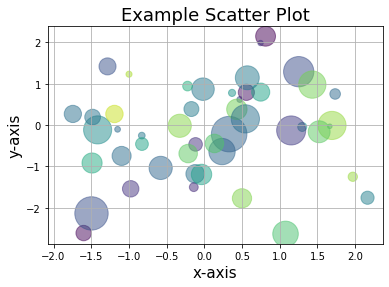

In [7]:
N_points = 100

# Generate a random normal distributions, for x and y variables and also some for color and marker volume
x = np.random.randn(N_points)
y = np.random.randn(N_points)
scatter_color=np.random.randn(N_points)
scatter_size=np.random.randn(N_points)*500

fig, ax = plt.subplots()
ax.scatter(x, y, c=scatter_color, s=scatter_size, alpha=0.5)

ax.set_xlabel('x-axis', fontsize=15)
ax.set_ylabel('y-axis', fontsize=15)
ax.set_title('Example Scatter Plot', fontsize=18)

ax.grid(True)
plt.show()

### Contour and Contourf

Contour plots (line or filled) are a method of plotting a 3D surface in 2D by plotting constant z values (contours) on a (x,y) grid. Lines are drawn connecting (x,y) coordinates with the same z value. We'll use `contour` and `contourf` for mapping.

#### contour

`plt.contour` plots contour lines. It takes three variables: an x-grid and y-grid, and the z value (think of it as the height of the surface). 

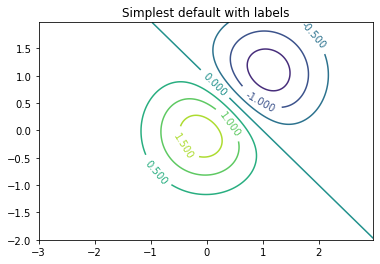

In [8]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')
plt.show()

#### contourf

`plt.contourf` draws filled contours. Like `plt.contour` it takes three gridded inputs and x, y, and z. You can set the number of contour levels with the levels agrument e.g. `levels=40`.

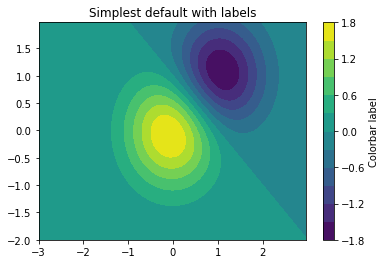

In [9]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Z, levels=12)

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Colorbar label')
ax.set_title('Simplest default with labels')
plt.show()

## Representing Uncertainty/Error

Observations always have an associated uncertainty. Communicating these uncertainties is an important task for scientists.

### Errorbars

The errorbars respresent the scatter in the data. `plt.errorbar` can be used to add vertical or horizontal errorbars with the arguments `yerr` or `xerr` respectively. These arguments should be set with an array the same length as the x and y arrays you are plotting and contain the corresponding error values. 

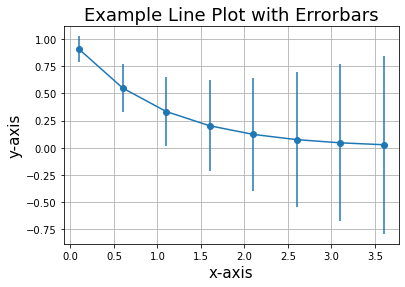

In [10]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example error bar values that vary with x-position
error = 0.1 + 0.2 * x

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=error, fmt='-o')
ax.set_title('Example Line Plot with Errorbars', fontsize=18)
ax.set_xlabel('x-axis', fontsize=15)
ax.set_ylabel('y-axis', fontsize=15)
ax.grid(True)
plt.show()

### Box and whisker

Box plots also communicate the distribution of the data represented by the marker, but they give more information (median, maxiumum, minimum, quartiles). The box gives the bounds of the lower and upper quartiles (25\%-75\%) of the data. The whiskers extend to the minimum and maximum values, excluding outliers (plotted as points). The line through the box is the sample median.

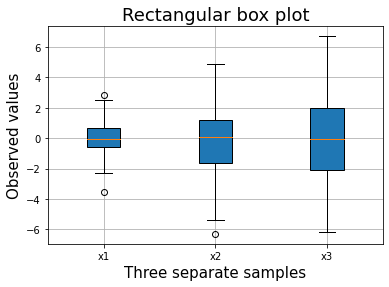

In [11]:
# Random test data
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, ax = plt.subplots()

# rectangular box plot
bplot1 = ax.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks


ax.grid(True)
ax.set_title('Rectangular box plot', fontsize=18)
ax.set_xlabel('Three separate samples', fontsize=15)
ax.set_ylabel('Observed values', fontsize=15)

plt.show()

### Violin

Violin plots are similar to box plots, but display even more information. Rather than summary statistics (e.g. median, quartiles) they show the full distribution of data.

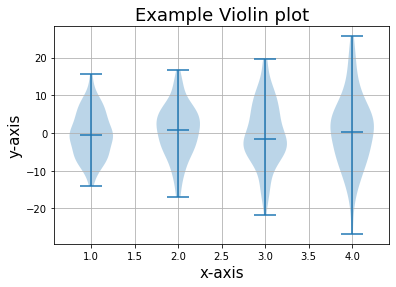

In [12]:
# generate some random test data zero mean
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

fig, ax = plt.subplots()


# plot violin plot
ax.violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
ax.set_title('Example Violin plot', fontsize=18)
ax.set_xlabel('x-axis', fontsize=15)
ax.set_ylabel('y-axis', fontsize=15)
ax.grid(True)
plt.show()